In [1]:
import numpy as np

# - Load training data (Total acceleration)

# Importing data as numpy array 
tx_train = np.loadtxt('HARDataset/train/Inertial_Signals/total_acc_x_train.txt')
print(np.shape(tx_train))

ty_train = np.loadtxt('HARDataset/train/Inertial_Signals/total_acc_y_train.txt')
print(np.shape(ty_train))

tz_train = np.loadtxt('HARDataset/train/Inertial_Signals/total_acc_z_train.txt')
print(np.shape(tz_train))

# Each one is (7352, 128)

# Cocatenate x,y,z training data together
t_train = np.hstack((tx_train, ty_train, tz_train))
# (7352, 384)

# Load labels for training data - USE FOR ALL
t_labelTrain = np.loadtxt('HARDataset/train/y_train.txt')
# (7352, )

# % Define sampling frequency (in Hz) 
fs = 50;

(7352, 128)
(7352, 128)
(7352, 128)


In [2]:
# - Load test data (Total acceleration)
ax_test = np.loadtxt('HARDataset/test/Inertial_Signals/total_acc_x_test.txt')
ay_test = np.loadtxt('HARDataset/test/Inertial_Signals/total_acc_y_test.txt')
az_test = np.loadtxt('HARDataset/test/Inertial_Signals/total_acc_z_test.txt')
total_test = np.concatenate((ax_test, ay_test, az_test),axis=1)
# (2947, 384)

# Load labels
t_labelTest = np.loadtxt('HARDataset/test/y_test.txt')

In [3]:
# - Load training data (Removing body acceleration)

bx_train = np.loadtxt('HARDataset/train/Inertial_Signals/body_acc_x_train.txt')
by_train = np.loadtxt('HARDataset/train/Inertial_Signals/body_acc_y_train.txt')
bz_train = np.loadtxt('HARDataset/train/Inertial_Signals/body_acc_z_train.txt')
b_train = np.hstack((bx_train, by_train, bz_train))

In [4]:
# - Load test data (Removing body acceleration)
bx_test = np.loadtxt('HARDataset/test/Inertial_Signals/body_acc_x_test.txt')
by_test = np.loadtxt('HARDataset/test/Inertial_Signals/body_acc_y_test.txt')
bz_test = np.loadtxt('HARDataset/test/Inertial_Signals/body_acc_z_test.txt')
b_test = np.hstack((bx_test, by_test, bz_test))

In [5]:
# - Load training data (gyroscope)
gx_train = np.loadtxt('HARDataset/train/Inertial_Signals/body_gyro_x_train.txt')
gy_train = np.loadtxt('HARDataset/train/Inertial_Signals/body_gyro_y_train.txt')
gz_train = np.loadtxt('HARDataset/train/Inertial_Signals/body_gyro_z_train.txt')
g_train = np.hstack((gx_train, gy_train, gz_train))
# (7352, 384)

In [6]:
# Load test data (gyroscope)
gx_test = np.loadtxt('HARDataset/test/Inertial_Signals/body_gyro_x_test.txt')
gy_test = np.loadtxt('HARDataset/test/Inertial_Signals/body_gyro_y_test.txt')
gz_test = np.loadtxt('HARDataset/test/Inertial_Signals/body_gyro_z_test.txt')
g_test = np.hstack((gx_test, gy_test, gz_test))
# (2947, 384)

In [7]:
# Normalize data or features
from sklearn.preprocessing import StandardScaler
def normData(a_train):
    a_len = int(np.shape(a_train)[1]/4)
    
    #scalars to normalize
    x_scaler = StandardScaler().fit(a_train[:,:a_len])
    y_scaler = StandardScaler().fit(a_train[:,a_len:2*a_len])
    z_scaler = StandardScaler().fit(a_train[:,2*a_len:3*a_len])
    m_scaler = StandardScaler().fit(a_train[:,3*a_len:])
    
    #normalize training
    x_scaler.transform(a_train[:,:a_len])
    y_scaler.transform(a_train[:,a_len:2*a_len])
    z_scaler.transform(a_train[:,2*a_len:3*a_len])
    m_scaler.transform(a_train[:,3*a_len:])
        
    return a_train

In [8]:
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
# Copying over from Features.ipynb to get potential features - detect_peaks.py and feature_select.py
import feature_select as fs
from detect_peaks import detect_peaks

# Use this function to extract various features (mean, stds, skews ..etc) from dataset
# Need to pass in x's, y's, and z's from time domain
def extractFeatures(tx, ty, tz):
    print(tx.shape)
    # Calculate magnitudes for time domain
    tm = fs.calcMag(tx, ty, tz)

    # Convert to frequency domain (FD) data - train only
    freq, fx, fy, fz, fm = fs.convertFD(tx, ty, tz)

    # Combine all raw data for time and frequency domain - horizontal stack 
    t_combined = np.concatenate((tx, ty, tz, tm),axis=1)
    f_combined = np.concatenate((fx, fy, fz, fm),axis=1)

    # Normalize data - time domain and frequency domain
    # Created new function above because only doing this for train data
    t_combined = normData(t_combined)
    # FD
    f_combined = normData(f_combined)

    # Means and stds (TD, FD)
    # TD
    # Find mean and std of x, y, z, magnitude and concatenate 
    # tMus_train, tStds_train = fs.muStds(t_train)
    axMu = np.mean(tx,axis=1)
    ayMu = np.mean(ty,axis=1)
    azMu = np.mean(tz,axis=1)
    amMu = np.mean(tm,axis=1)
    tMus = np.vstack((axMu, ayMu, azMu, amMu)).T
    axStd = np.std(tx,axis=1)
    ayStd = np.std(ty,axis=1)
    azStd = np.std(tz,axis=1)
    amStd = np.std(tm,axis=1)
    tStds = np.vstack((axStd, ayStd, azStd, amStd)).T
    # Normalize
    tMus = normData(tMus)
    tStds = normData(tStds)

    #FD
    # fMus_train, fStds_train = fs.muStds(f_train)
    # Find mean and std  of x, y, z and concatenate 
    fxMu = np.mean(fx,axis=1)
    fyMu = np.mean(fy,axis=1)
    fzMu = np.mean(fz,axis=1)
    fmMu = np.mean(fm,axis=1)
    fMus = np.vstack((fxMu, fyMu, fzMu, fmMu)).T
    fxStd = np.std(fx,axis=1)
    fyStd = np.std(fy,axis=1)
    fzStd = np.std(fz,axis=1)
    fmStd = np.std(fm,axis=1)
    fStds = np.vstack((fxStd, fyStd, fzStd, fmStd)).T
    # Normalize
    fMus = normData(fMus)
    fStds = normData(fStds)

    print(tMus.shape, tStds.shape, fMus.shape, fStds.shape)

    # Skew measures asymmetry of data around mean, Kurtosis measures tail of data
    # Skew and Kurtosis (TD, FD)
    # TD
    # tSks_train, tKts_train = fs.skewKurt(t_train)
    # Find Skew & Kurtosis for x, y, z, magnitude, and concatenate 
    axSk = skew(tx,axis=1)
    aySk = skew(ty,axis=1)
    azSk = skew(tz,axis=1)
    amSk = skew(tm,axis=1)
    tSks = np.vstack((axSk, aySk, azSk, amSk)).T

    axKurt = kurtosis(tx,axis=1)
    ayKurt = kurtosis(ty,axis=1)
    azKurt = kurtosis(tz,axis=1)
    amKurt = kurtosis(tm,axis=1)
    tKts = np.vstack((axKurt, ayKurt, azKurt, amKurt)).T

    # Normalize
    tSks = normData(tSks)
    tKts = normData(tKts)

    # FD
    # fSks_train, fKts_train = fs.skewKurt(f_train)
    faxSk = skew(fx,axis=1)
    faySk = skew(fy,axis=1)
    fazSk = skew(fz,axis=1)
    famSk = skew(fm,axis=1)
    fSks = np.vstack((faxSk, faySk, fazSk, famSk)).T

    faxKurt = kurtosis(fx,axis=1)
    fayKurt = kurtosis(fy,axis=1)
    fazKurt = kurtosis(fz,axis=1)
    famKurt = kurtosis(fm,axis=1)
    fKts = np.vstack((faxKurt, fayKurt, fazKurt, famKurt)).T

    # Normalize
    fSks = normData(fSks)
    fKts = normData(fKts)

    print(tSks.shape, tKts.shape, fSks.shape, fKts.shape)

    # Number of peaks and top peaks
    # Adjust top # peaks here
    n=3

    # TD
    tnp, tp = fs.findPeaks(t_combined,n)
    # Normalize
    tp = normData(tp)
    tnp = normData(tnp)

    # FD
    fnp, fp = fs.findPeaks(f_combined,n)
    # Normalize
    fp = normData(fp)
    fnp = normData(fnp)
 
    print(tnp.shape, tp.shape, fnp.shape, fp.shape)

    allFeaturesCombined = np.concatenate((tMus, tStds, fMus, fStds,
                                   tSks, tKts, fSks, fKts,
                                   tp, tnp, fp, fnp),axis=1)

    print(allFeaturesCombined.shape)
  
    return allFeaturesCombined
  

In [9]:
# Trying to pinpoint best features with SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

total_features_train = extractFeatures(tx_train, ty_train, tz_train)

# Parameters: Training data and labels
select_features_train = SelectKBest(f_regression, k=5).fit(total_features_train, t_labelTrain)

# Use .fit() above in order to use this
featuresMask = select_features_train.get_support(indices=True)

# Change this so the above function labels with dataframes!
# Feature names to choose from - n = 3
featureNames = ['xMean', 'yMean', 'zMean', 'magnitudeMean', 'xStd', 'yStd', 'zStd', 'magnitudeStd', 
               'xFreqMean', 'yFreqMean', 'zFreqMean', 'magnitudeFreqMean', 'xFreqStd', 'yFreqStd',
               'zFreqStd', 'magnitudeFreqStd', 'xSkew', 'ySkew', 'zSkew', 'magnitudeSkew', 'xKurtosis',
               'yKurtosis', 'zKurtosis', 'magnitudeKurtosis', 'xFreqSkew', 'yFreqSkew', 'zFreqSkew', 
               'magnitudeFreqSkew', 'xFreqKurtosis', 'yFreqKurtosis', 'zFreqKurtosis', 
               'magnitudeFreqKurtosis', 'XPeaks1', 'XPeaks2', 'XPeaks3', 'YPeaks1', 'YPeaks2','YPeaks3', 
               'ZPeaks1','ZPeaks2','ZPeaks3','magnitudePeaks1','magnitudePeaks2','magnitudePeaks3',
               'XNumPeaks1', 'XNumPeaks2', 'XNumPeaks3', 'YNumPeaks1', 'YNumPeaks2','YNumPeaks3',
               'ZNumPeaks1','ZNumPeaks2','ZNumPeaks3', 'magnitudeNumPeaks1','magnitudeNumPeaks2','magnitudeNumPeaks3',
               'XFreqPeaks1', 'XFreqPeaks2', 'XFreqPeaks3', 'YFreqPeaks1', 'YFreqPeaks2','YFreqPeaks3',
               'ZFreqPeaks1','ZFreqPeaks2','ZFreqPeaks3', 'magnitudeFreqPeaks1','magnitudeFreqPeaks2',
               'magnitudeFreqPeaks3','XNumFreqPeaks1', 'XNumFreqPeaks2', 'XNumFreqPeaks3', 'YNumFreqPeaks1', 'YNumFreqPeaks2',
               'YNumFreqPeaks3','ZNumFreqPeaks1','ZNumFreqPeaks2','ZNumFreqPeaks3', 'magnitudeFreqNumPeaks1',
               'magnitudeFreqNumPeaks2','magnitudeFreqNumPeaks3'
               ]

print(len(featureNames))

# Create dataframe out of total_features_train with featureNames
featuresTrainDf = pd.DataFrame(data=total_features_train, columns=featureNames)
selectedFeaturesTrainDf = featuresTrainDf[featuresTrainDf.columns[featuresMask]]
print(featuresTrainDf.columns[featuresMask])
print(selectedFeaturesTrainDf.shape)

# Using selectk doesn't help
selectedFeaturesTrainData = selectedFeaturesTrainDf.to_numpy()

# Do the same thing with test data and use the same mask on test
# Split up testing data
test_len = int(np.shape(total_test)[1]/3)
tx_test = total_test[:,:test_len]
ty_test = total_test[:,test_len:2*test_len]
tz_test = total_test[:,2*test_len:]
print(tx_test.shape)
print(ty_test.shape)
print(tz_test.shape)

total_features_test = extractFeatures(tx_test, ty_test, tz_test)

featuresTestDf = pd.DataFrame(data=total_features_test, columns=featureNames)
selectedFeaturesTestDf = featuresTestDf[featuresTestDf.columns[featuresMask]]

# Using selectk doesn't help :(
selectedFeaturesTestData = selectedFeaturesTestDf.to_numpy()


(7352, 128)
(7352, 4) (7352, 4) (7352, 4) (7352, 4)
(7352, 4) (7352, 4) (7352, 4) (7352, 4)
(7352, 12) (7352, 12) (7352, 12) (7352, 12)
(7352, 80)
80
Index(['yStd', 'zStd', 'XNumPeaks1', 'XNumPeaks2', 'XNumPeaks3'], dtype='object')
(7352, 5)
(2947, 128)
(2947, 128)
(2947, 128)
(2947, 128)
(2947, 4) (2947, 4) (2947, 4) (2947, 4)
(2947, 4) (2947, 4) (2947, 4) (2947, 4)
(2947, 12) (2947, 12) (2947, 12) (2947, 12)
(2947, 80)


In [10]:
# Do same thing as above for Body Accel. and Gyroscope data

bodyAcc_features_train = extractFeatures(bx_train, by_train, bz_train)

gyro_features_train = extractFeatures(gx_train, gy_train, gz_train)

bodyAcc_features_test = extractFeatures(bx_test, by_test, bz_test)

gyro_features_test = extractFeatures(gx_test, gy_test, gz_test)


(7352, 128)
(7352, 4) (7352, 4) (7352, 4) (7352, 4)
(7352, 4) (7352, 4) (7352, 4) (7352, 4)
(7352, 12) (7352, 12) (7352, 12) (7352, 12)
(7352, 80)
(7352, 128)
(7352, 4) (7352, 4) (7352, 4) (7352, 4)
(7352, 4) (7352, 4) (7352, 4) (7352, 4)
(7352, 12) (7352, 12) (7352, 12) (7352, 12)
(7352, 80)
(2947, 128)
(2947, 4) (2947, 4) (2947, 4) (2947, 4)
(2947, 4) (2947, 4) (2947, 4) (2947, 4)
(2947, 12) (2947, 12) (2947, 12) (2947, 12)
(2947, 80)
(2947, 128)
(2947, 4) (2947, 4) (2947, 4) (2947, 4)
(2947, 4) (2947, 4) (2947, 4) (2947, 4)
(2947, 12) (2947, 12) (2947, 12) (2947, 12)
(2947, 80)


In [11]:
# MODEL: Concatenate every possible feature + raw FD/TD inputs (ALL)
ev_trainALL = np.concatenate((t_train, b_train, g_train, total_features_train, bodyAcc_features_train, gyro_features_train),axis=1)
ev_testALL = np.concatenate((total_test, b_test, g_test, total_features_test, bodyAcc_features_test, gyro_features_test),axis=1)

print(ev_trainALL.shape)
print(ev_testALL.shape)

(7352, 1392)
(2947, 1392)


In [12]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# Testing out with Neural Networks
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Testing out different varieties
# (40,40,50)
layerSizes = [(40,40,50), (40,50,50), (50,50,50)]
# relu works better cause training is faster
parameter_space = {
    'hidden_layer_sizes': layerSizes,
    'activation': ['relu'],
    'solver': ['lbfgs', 'sgd'],
}

# Change training set, and testing set as needed

gridSearch = GridSearchCV(MLPClassifier(), parameter_space, n_jobs=4, cv=3, refit=True, return_train_score=True)
gridSearch.fit(ev_trainALL, t_labelTrain)

print(gridSearch.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (40, 50, 50), 'solver': 'sgd'}


In [13]:
# Use best params for MLPClassifier
# Create pipeline
pipeline = make_pipeline(
                    MLPClassifier(hidden_layer_sizes=gridSearch.best_params_['hidden_layer_sizes'], 
                                  activation=gridSearch.best_params_['activation'], 
                                  solver=gridSearch.best_params_['solver']))

#timing
get_ipython().run_line_magic('time', 'pipeline.fit(ev_trainALL, t_labelTrain)')
get_ipython().run_line_magic('time', 'y_pred = pipeline.predict(ev_testALL)')

# # evaluate pipeline - insert train, label, and test data
# y_pred = pipeline.fit(ev_trainALL, t_labelTrain).predict(ev_testALL)

CPU times: user 53 s, sys: 1.98 s, total: 55 s
Wall time: 31.2 s
CPU times: user 94.3 ms, sys: 44.7 ms, total: 139 ms
Wall time: 70.8 ms


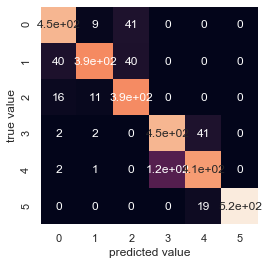

In [14]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

mat = confusion_matrix(t_labelTest, y_pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [15]:
# Best parameter set
print('Best parameters found:\n', gridSearch.best_params_)

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (40, 50, 50), 'solver': 'sgd'}


In [16]:
from sklearn.metrics import accuracy_score

print('Results on the test set:')
print(accuracy_score(t_labelTest, y_pred) * 100)

Results on the test set:
88.49677638276214


In [17]:
from sklearn.metrics import precision_score

# AUC/Precision Score
ps = precision_score(t_labelTest, y_pred, average="macro")
print("AUC: %.3f" %ps)

AUC: 0.887
